# Classification

We will be using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

In this project the Iris dataset will be used.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

**#1.** The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

**Download the Data Folder**. The Data Set Description contains definitions of the columns.

In [1]:
# Here are all imports that we will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

**Load the data from the file (iris.data) into the DataFrame**

In [2]:
att = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('iris.data', names = att )

**Data inspection.** Show the first 5 rows of the dataset and prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length. Seaborn.lmplot is going to be used for plotting.

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


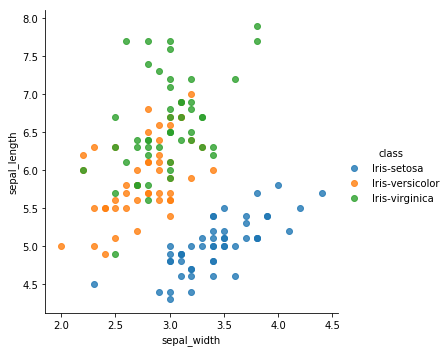

In [4]:
sns.lmplot(x="sepal_width", y="sepal_length", data=iris, hue="class", fit_reg=False)

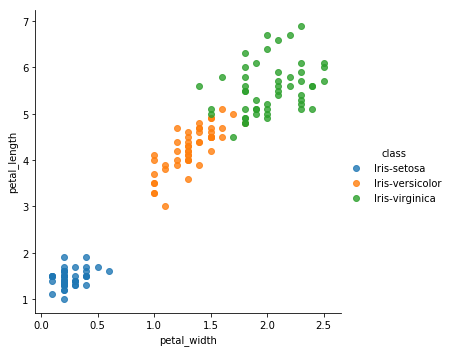

In [5]:
sns.lmplot(x="petal_width", y="petal_length", data=iris, hue="class", fit_reg=False)

**There are three classes with 50 observations in each class:**

In [6]:
iris['class'].describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: class, dtype: object

**From mean we can tell sepal is larger than petal.**

In [7]:
iris[0:3].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,3.0,3.000000,3.000000,3.000000e+00
mean,4.9,3.233333,1.366667,2.000000e-01
std,0.2,0.251661,0.057735,3.399350e-17
min,4.7,3.000000,1.300000,2.000000e-01
25%,4.8,3.100000,1.350000,2.000000e-01
50%,4.9,3.200000,1.400000,2.000000e-01
75%,5.0,3.350000,1.400000,2.000000e-01
max,5.1,3.500000,1.400000,2.000000e-01


**Create 3 dataframes for each class, from mean we can tell petal of Virginica is larger than the other two classes.**

In [8]:
setosa=iris[iris['class']=='Iris-setosa']
versicolor =iris[iris['class']=='Iris-versicolor']
virginica =iris[iris['class']=='Iris-virginica']
print(setosa.describe())
print(versicolor.describe())
print(virginica.describe())

       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.

**Prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length:**

<Figure size 432x288 with 0 Axes>

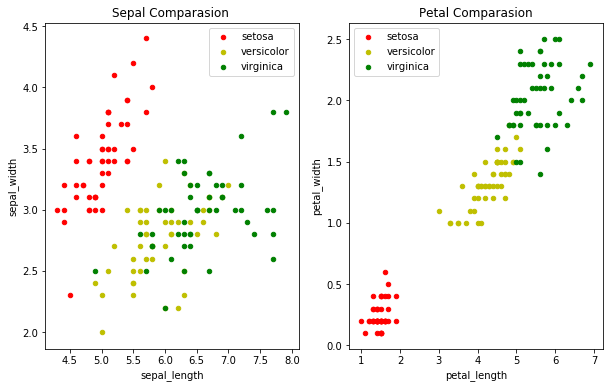

In [9]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(10, 6))
setosa.plot(x='sepal_length', y='sepal_width', kind= 'scatter',ax=ax[0],label='setosa',color='r')
versicolor.plot(x='sepal_length', y='sepal_width', kind='scatter',ax=ax[0],label='versicolor',color='y')
virginica.plot(x='sepal_length', y='sepal_width', kind='scatter', ax=ax[0], label='virginica', color='g')

setosa.plot(x='petal_length', y='petal_width', kind='scatter',ax=ax[1],label='setosa',color='r')
versicolor.plot(x='petal_length', y='petal_width', kind='scatter',ax=ax[1],label='versicolor',color='y')
virginica.plot(x='petal_length', y='petal_width', kind='scatter', ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal Comparasion ', ylabel='sepal_width')
ax[1].set(title='Petal Comparasion',  ylabel='petal_width')
ax[0].legend()
ax[1].legend()

**Actual features are described by columns 0-3. Last column contains labels of samples.
Firstly we need to split data into two arrays: x (features) and y (the reponse).**

In [8]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris[feature_cols].values
y = iris['class'].values

In [9]:
# loading library
#set setosa correspond to 0, 
#versicolor correspond to 1 and virginica correspond to 2
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

**Split dataset into training set and test set.**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3)

**Instantiate learning model (k = 3), fitting the model, predicting the Test set results.**

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 88.89 %.


**Count the numbers of correct predictions and mispredictions.**

In [14]:
print('number of correct predictions is ' + str(np.size(y_test - y_pred) - np.count_nonzero(y_test - y_pred)))
print('number of mispredictions is ' + str(np.count_nonzero(y_test - y_pred)))

number of correct predictions is 40
number of mispredictions is 5


In [15]:
# creating list of K for KNN
k_list = [1, 3, 5, 10, 20, 30, 40]
scores = []
num_wrongs = []
num_corrects = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    my_y_pred = knn.predict(x_test)
    accuracy = round(accuracy_score(y_test, my_y_pred)*100, 2)
    wrongs = np.count_nonzero(y_test - my_y_pred)
    num_wrongs.append(wrongs)
    num_corrects.append(np.size(y_test - my_y_pred) - wrongs)
    scores.append(accuracy)

In [16]:
# evaluate accuracy
scores

[91.11, 88.89, 91.11, 93.33, 93.33, 88.89, 84.44]

In [17]:
# Number of mispredictions
num_wrongs

[4, 5, 4, 3, 3, 5, 7]

In [18]:
# Number of correct predictions
num_corrects

[41, 40, 41, 42, 42, 40, 38]

In [19]:
compare_df = pd.DataFrame({'Correct Predictions':num_corrects,'Accuracy Score':scores}, index=[k_list])
compare_df


,Correct Predictions,Accuracy Score
1,41,91.11
3,40,88.89
5,41,91.11
10,42,93.33
20,42,93.33
30,40,88.89
40,38,84.44


Text(0, 0.5, 'Accuracy')

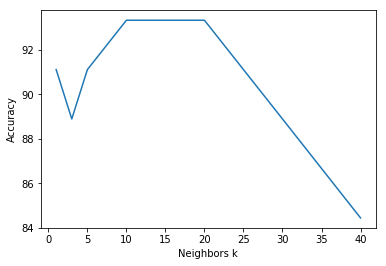

In [20]:
plt.plot(k_list,compare_df['Accuracy Score'])
plt.xlabel('Neighbors k')
plt.ylabel('Accuracy')